In [248]:
import bs4
import requests

In [249]:
from bs4 import BeautifulSoup

In [250]:
url="https://www.wunderground.com/history/daily/in/vijayawada/VOBZ/date/2024-8-23"

In [251]:
b = requests.get(url)
b

<Response [200]>

In [252]:
type(b.text)

str

In [253]:
soup=BeautifulSoup(b.content,'html.parser')
type(soup)

bs4.BeautifulSoup

In [254]:
soup.prettify()

'<!DOCTYPE html>\n<html itemscope="" itemtype="http://schema.org/Organization" lang="en" prefix="og: http://ogp.me/ns#">\n <head itemscope="" itemtype="http://schema.org/WebSite">\n  <meta charset="utf-8"/>\n  <title>\n   Vijayawada, India Weather History | Weather Underground\n  </title>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <link href="//widgets.outbrain.com" rel="dns-prefetch"/>\n  <link href="//odb.outbrain.com" rel="dns-prefetch"/>\n  <link href="//c.amazon-adsystem.com" rel="dns-prefetch"/>\n  <link href="//s.amazon-adsystem.com" rel="dns-prefetch"/>\n  <link href="//aax.amazon-adsystem.com" rel="dns-prefetch"/>\n  <link href="//partner.googleadservices.com" rel="dns-prefetch"/>\n  <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>\n  <link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>\n  <link href="//h.nexac.com" rel="dns-prefetch"/>\n  <link href="/

In [255]:
c=soup.find_all('th')
temp=[]
for i in c:
    first_cell=i.find('td')
    if(first_cell):
        temp.append(first_cell.text.strip())
    second_cell=i.find('td')
print(temp)
print(len(temp))

[]
0


In [256]:
c = soup.find_all('th')
temp = []
for i in c:
    print(f"Processing {i}")  # print the current tr element
    first_cell = i.find('td')
    if first_cell:
        print(f"Found td element: {first_cell}")  # print the found td element
        temp.append(first_cell.text.strip())
    else:
        print("No td element found")  # print if no td element is found
print(temp)
print(len(temp))

[]
0


In [257]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [258]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [301]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Set up the webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Navigate to the webpage
url = 'https://www.wunderground.com/history/daily/in/vijayawada/VOBZ/date/2024-8-23'
driver.get(url)

# Wait for the table to load
time.sleep(5)

# Get the HTML content of the page
html = driver.page_source

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

# Find the table
table = soup.find('table', class_='mat-table cdk-table mat-sort ng-star-inserted')

# Find the rows in the table
rows = table.find_all('tr')

# Create lists to store the data
data = []

# Iterate over the rows
for row in rows[1:9]:
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    data.append(row_data)

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Close the webdriver
driver.quit()

          0      1      2      3     4       5       6          7        8  \
0   8:30 PM  79 °F  76 °F  91 °%  CALM  0 °mph  0 °mph  29.64 °in  0.0 °in   
1  12:30 AM  78 °F  76 °F  93 °%    NW  3 °mph  0 °mph  29.65 °in  0.0 °in   
2   3:30 AM  79 °F  77 °F  93 °%  CALM  0 °mph  0 °mph  29.67 °in  0.0 °in   
3   5:30 AM  80 °F  78 °F  91 °%  CALM  0 °mph  0 °mph  29.68 °in  0.0 °in   
4   8:30 AM  84 °F  81 °F  89 °%  CALM  0 °mph  0 °mph  29.62 °in  0.0 °in   
5  11:30 AM  83 °F  80 °F  89 °%  CALM  0 °mph  0 °mph  29.58 °in  0.0 °in   
6   2:30 PM  81 °F  79 °F  93 °%  CALM  0 °mph  0 °mph  29.65 °in  0.0 °in   
7   5:30 PM  81 °F  79 °F  95 °%  CALM  0 °mph  0 °mph  29.67 °in  0.0 °in   

                   9  
0             Cloudy  
1            Thunder  
2  Light Rain Shower  
3             Cloudy  
4             Cloudy  
5      Mostly Cloudy  
6             Cloudy  
7      Partly Cloudy  


In [302]:
df.shape[1]

10

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8 non-null      object
 1   1       8 non-null      object
 2   2       8 non-null      object
 3   3       8 non-null      object
 4   4       8 non-null      object
 5   5       8 non-null      object
 6   6       8 non-null      object
 7   7       8 non-null      object
 8   8       8 non-null      object
 9   9       8 non-null      object
dtypes: object(10)
memory usage: 772.0+ bytes


In [305]:
df = df.rename(columns={0: 'Time', 1: 'Temperature', 2: 'Dew point',3:'Humidity',4:'Wind',5:'WindSpeed',6:'WindGust',7:'Pressure',8:'Precipitation',9:'Condition'})
df

,Time,Temperature,Dew point,Humidity,Wind,WindSpeed,WindGust,Pressure,Precipitation,Condition
0,8:30 PM,79 °F,76 °F,91 °%,CALM,0 °mph,0 °mph,29.64 °in,0.0 °in,Cloudy
1,12:30 AM,78 °F,76 °F,93 °%,NW,3 °mph,0 °mph,29.65 °in,0.0 °in,Thunder
2,3:30 AM,79 °F,77 °F,93 °%,CALM,0 °mph,0 °mph,29.67 °in,0.0 °in,Light Rain Shower
3,5:30 AM,80 °F,78 °F,91 °%,CALM,0 °mph,0 °mph,29.68 °in,0.0 °in,Cloudy
4,8:30 AM,84 °F,81 °F,89 °%,CALM,0 °mph,0 °mph,29.62 °in,0.0 °in,Cloudy
5,11:30 AM,83 °F,80 °F,89 °%,CALM,0 °mph,0 °mph,29.58 °in,0.0 °in,Mostly Cloudy
6,2:30 PM,81 °F,79 °F,93 °%,CALM,0 °mph,0 °mph,29.65 °in,0.0 °in,Cloudy
7,5:30 PM,81 °F,79 °F,95 °%,CALM,0 °mph,0 °mph,29.67 °in,0.0 °in,Partly Cloudy


In [281]:
df.shape[1]

10

In [284]:
temp=[]
for i in range(1, 9):
    temp.append(df.loc[i, 'Temperature'])
print(temp)
t=0
for i in temp:
    if '\xa0°F' in i:
        i=i.replace('\xa0°F','')
        t+=float(i)
t=t/8;
t


['79\xa0°F', '78\xa0°F', '79\xa0°F', '80\xa0°F', '84\xa0°F', '83\xa0°F', '81\xa0°F', '81\xa0°F']


80.625

In [226]:
hum=[]
for i in range(1, 9):
    hum.append(df.loc[i, 'Humidity'])
#print(hum)
h=0
for i in hum:
    if '\xa0°%' in i:
        i=i.replace('\xa0°%','')
        h+=float(i)
h=h/8;
h

91.75

In [228]:
pres=[]
for i in range(1, 9):
    pres.append(df.loc[i, 'Precipitation'])
#print(pres)
p=0
for i in hum:
    if '\xa0°in' in i:
        i=i.replace('\xa0°in','')
        h+=float(i)
p=p/8;
p

0.0

In [215]:
import statistics
condition=[]
for i in range(1,9):
    condition.append(df.loc[i,'Condition'])
r=statistics.mode(condition)
r

'Cloudy'

In [291]:
from IPython.display import clear_output
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import pandas as pd


from datetime import datetime, timedelta




In [317]:
# Define the start and end dates
start_date = datetime(2023, 8, 23)  # YYYY, M, D
end_date = datetime(2024, 8, 23)   # YYYY, M, D


In [318]:
# Create a timedelta object to represent one day
delta = timedelta(days=1)

# Iterate over the date range
current_date= start_date
current_date


datetime.datetime(2023, 8, 23, 0, 0)

In [325]:
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import statistics
from datetime import datetime, timedelta

# Define your start date, end date, and delta
current_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 7)
delta = timedelta(days=1)

# Lists to store the scraped data
temperature = []
humidity = []
precipitation = []
conditions = []

while current_date <= end_date:
    url = f"https://www.wunderground.com/history/daily/in/vijayawada/VOBZ/date/{current_date.strftime('%Y-%m-%d')}"
    print('Scraping from', current_date.strftime('%Y-%m-%d'))

    # Initialize the web driver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

    # Connect to the webpage
    driver.get(url)
    time.sleep(5)  # Wait for the table to load

    # Get the HTML content of the page
    html = driver.page_source
    driver.quit()  # Close the driver

    # Create a BeautifulSoup object
    soup = BeautifulSoup(html, 'html.parser')

    # Find the table
    table = soup.find('table', class_='mat-table cdk-table mat-sort ng-star-inserted')

    # If the table is not found, skip this date
    if table is None:
        print("Table not found for", current_date.strftime('%Y-%m-%d'))
        current_date += delta
        continue

    # Convert table HTML to DataFrame
    rows = table.find_all('tr')
    data = []

    for row in rows:
        cols = row.find_all('td')
        row_data = [col.text.strip() for col in cols]
        data.append(row_data)

    # Create a DataFrame
    df = pd.DataFrame(data)
    if df.empty:
        print("No data found for", current_date.strftime('%Y-%m-%d'))
        current_date += delta
        continue

    # Check and set column names
    print("Columns in DataFrame:", df.columns)
    expected_columns = ['Time', 'Temperature', 'Dew point', 'Humidity', 'Wind', 'WindSpeed', 'WindGust', 'Pressure', 'Precipitation', 'Condition']
    df.columns = expected_columns[:len(df.columns)]  # Adjust based on actual DataFrame columns

    # Calculate average temperature
    temp = []
    if 'Temperature' in df.columns:
        temp = [df.loc[i, 'Temperature'] for i in range(len(df))]
        temp = [i for i in temp if i and '\xa0°F' in i]  # Filter out None and empty strings
        temp = [i.replace('\xa0°F', '') for i in temp]
        if temp:
            avg_temp = sum(float(i) for i in temp) / len(temp)
        else:
            avg_temp = 0.0
    else:
        avg_temp = 0.0
    temperature.append(avg_temp)

    # Calculate average humidity
    hum = []
    if 'Humidity' in df.columns:
        hum = [df.loc[i, 'Humidity'] for i in range(len(df))]
        hum = [i for i in hum if i and '\xa0°%' in i]  # Filter out None and empty strings
        hum = [i.replace('\xa0°%', '') for i in hum]
        if hum:
            avg_hum = sum(float(i) for i in hum) / len(hum)
        else:
            avg_hum = 0.0
    else:
        avg_hum = 0.0
    humidity.append(avg_hum)

    # Calculate average precipitation
    pres = []
    if 'Precipitation' in df.columns:
        pres = [df.loc[i, 'Precipitation'] for i in range(len(df))]
        pres = [i for i in pres if i and '\xa0°in' in i]  # Filter out None and empty strings
        pres = [i.replace('\xa0°in', '') for i in pres]
        if pres:
            avg_pres = sum(float(i) for i in pres) / len(pres)
        else:
            avg_pres = 0.0
    else:
        avg_pres = 0.0
    precipitation.append(avg_pres)

    # Find the mode of condition
    if 'Condition' in df.columns:
        condition = [df.loc[i, 'Condition'] for i in range(len(df))]
        condition = [c for c in condition if c]  # Filter out None and empty strings
        if condition:
            mode_condition = statistics.mode(condition)
        else:
            mode_condition = None
    else:
        mode_condition = None
    conditions.append(mode_condition)

    # Move to the next date
    current_date += delta

# Output results
print("Temperature:", temperature)
print("Humidity:", humidity)
print("Precipitation:", precipitation)
print("Conditions:", conditions)



Scraping from 2024-01-01
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Scraping from 2024-01-02
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Scraping from 2024-01-03
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Scraping from 2024-01-04
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Scraping from 2024-01-05
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Scraping from 2024-01-06
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Scraping from 2024-01-07
Columns in DataFrame: RangeIndex(start=0, stop=10, step=1)
Temperature: [76.25, 75.625, 76.375, 75.28571428571429, 74.75, 73.71428571428571, 75.0]
Humidity: [75.0, 75.0, 73.625, 74.57142857142857, 69.75, 78.14285714285714, 73.0]
Precipitation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Conditions: ['Fair', 'Partly Cloudy', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [331]:
import pandas as pd
D1=pd.DataFrame({'Temperature':temperature})
D2=pd.DataFrame({'Humidity':humidity})
D3=pd.DataFrame({'Precipitation':precipitation})
D4=pd.DataFrame({'Conditions':conditions})
DF=pd.concat([D1,D2,D3,D4],axis=1)
print(DF)

   Temperature   Humidity  Precipitation     Conditions
0    76.250000  75.000000            0.0           Fair
1    75.625000  75.000000            0.0  Partly Cloudy
2    76.375000  73.625000            0.0           Fair
3    75.285714  74.571429            0.0           Fair
4    74.750000  69.750000            0.0           Fair
5    73.714286  78.142857            0.0           Fair
6    75.000000  73.000000            0.0           Fair


In [332]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    7 non-null      float64
 1   Humidity       7 non-null      float64
 2   Precipitation  7 non-null      float64
 3   Conditions     7 non-null      object 
dtypes: float64(3), object(1)
memory usage: 356.0+ bytes


In [336]:
import plotly

In [337]:
import plotly.express as px

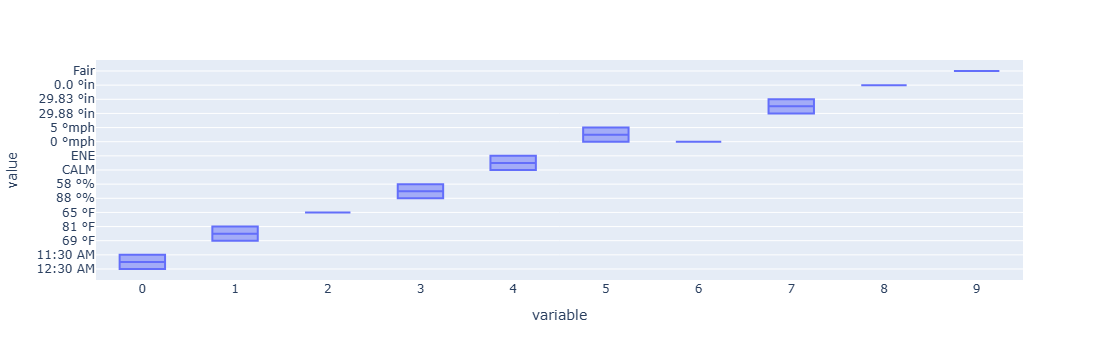

In [340]:
px.box(data)

In [343]:
import sklearn #pip install scikit-learn
import numpy as np

In [344]:
#To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

In [345]:
label = LabelEncoder()
label

LabelEncoder()

In [346]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('your_data.csv')

# Preprocess the data
X = df.drop(['target'], axis=1)  # features
y = df['target']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Visualize the decision tree using matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_clf, filled=True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'